# Creating a model for voice recognition
In this notebook, we will create a model to recognize who is talking (man or woman).

## Loading the packages

In [19]:
import numpy as np
import matplotlib.pyplot as pl
import os
import glob
import scipy.io.wavfile as wav
from python_speech_features import mfcc

## The Dataset

The dataset consists of .wav files respresenting different people pronoucing vowels (man or woman). The final dataset will contains 13 characteristics based on different sound features (mfcc) and the class ∈ {1, -1}.

In [42]:
PATH = 'vowels/'

dataset = []

# Read all wav files in the vowels directory (for now only men and women)
for filepath in glob.glob(PATH + 'na[f|m]*'):
    sample_rate, X = wav.read(filepath)
    ceps = mfcc(X, samplerate=sample_rate, nfft=1024)

    # Create dataset row for the selected file
    file_dataset = []
    file_dataset.append(ceps.mean(axis=0))    
    file_dataset.append(-1 if 'naf' in filepath else 1);
    
    # Add it to the dataset
    dataset.append(ceps)
    
dataset = np.array(dataset)
print(dataset)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

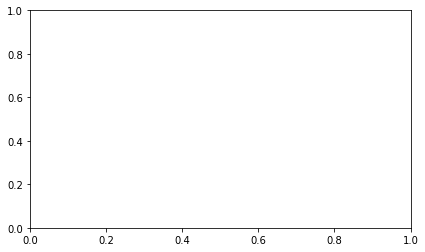

In [41]:
pl.figure(figsize=(15,4))
pl.subplot(1,2,1)
pl.boxplot(dataset)
pl.title('Dataset')
pl.grid()